# Laboratorio 7: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>


### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliares: Catherine Benavides y Consuelo Rojas
- Ayudante: Nicolás Ojeda, Eduardo Moya

### Equipo: SUPER IMPORTANTE -https://github.com/Diana1020/Diana

- Nombre de alumno 1: Diana Escobar
- Nombre de alumno 2: Matías Donoso

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

### Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.



### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

 Los datos de entrenamiento, son para que el modelo aprenda y se ajuste a los datos con ciertos parámetros con el fin de que encuentre patrones y relaciones en los datos y los datos de validación vienen despues del entrenamiento, son para evaluar que tan bien funciona el modelo con datos diferentes a los datos de entrenamiento, aqui se puede probar con diferentes hiperaprámetros, antes de la evaluación final (datos de testeo)

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

Con los datos no supervisados no tenemos una etiqueta, por lo cual no hay una forma de ver si el modelo clasificó bien o mal, por lo cual no hay una métrica de desempeño puntual, se pueden plantear métricas como por naturaleza y entendimiento de los datos, pero no hay una forma de probar si esa informaicón es netamente correcta.

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

La matriz de confusión nos da los falsos positivos, falsos negativos, verdaderos positivos y verdaderos negativos, en el fondo es para ver que tan bien el modelo clasificó, y cuantas veces cometió errores tipo I o tipo II o cuantas veces clasificó bien. Se utiliza para obtener métricas como accuracy, sensibility,F1, etc. métricas que miden el desempeño del modelo.

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy : (TP + TN)/(TP+TN+FN+FP)
  * Precision: TP / (TP + FP)
  * Recall: TP / (TP + FN)
  * F1 score: (2* Precision * Recall)/(Precision + Recall)

Donde TN: verdadero negativo, TP: Verdadero positivo, FP: Falsos positivos, FN: Falsos negativos

Precision indica que tan precisas son las predicciones positivas del modelo; es decir, de todas las instancias clasificadas como positivas, cuántas lo son realmente.

Accuracy te da que tan bien clasificó, osea de ambos grupos que porcentaje lo clasificó bien.

Recall mide la capacidad del modelo para identificar todos los casos positivos reales, es decir, de todos los positivos reales, cuántos detectó correctamente el modelo.

F1 combina la precision con el recall, siendo útil en situaciones donde no se quiere favorecer una métrica sobre la otra y cuando hay desbalanceo de clases.

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  

  Precisión, para minimizar los falsos positivos para evitar paradas innecesarias y costosas de la maquinaria.

  * Detección de enfermedades altamente contagiosas.

  Recall, porque me interesa más no cometer errores en un diagnostico positivo.

  * Aprobación de créditos de alto riesgo.

  F1, ya que generalmente se va a tener menos a personas que no tienen ese alto riesgo, desbalaceo.

  * Detección de crímenes.

  F1, de igual forma que la anterior es porque se va a encontrar con datos desbalanceados.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]

La calibración de modelos ajusta las probabilidades predichas para que coincidan con las probabilidades reales, asegurando que las predicciones se puedan interpretar como confianza real en los resultados; se usa para mejorar la interpretación de las predicciones y tomar decisiones informadas.

**Respuesta:**

*Escriba su respuesta aquí*

# Parte práctica [48 puntos]

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv('/content/stats_players.csv')

In [3]:
df

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,...,27,56,14,16,13,13,11,13,15,12
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,...,28,53,12,17,12,11,12,13,16,12
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,...,54,61,41,44,28,42,35,36,42,37
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,...,34,48,15,23,14,12,13,12,24,12


## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

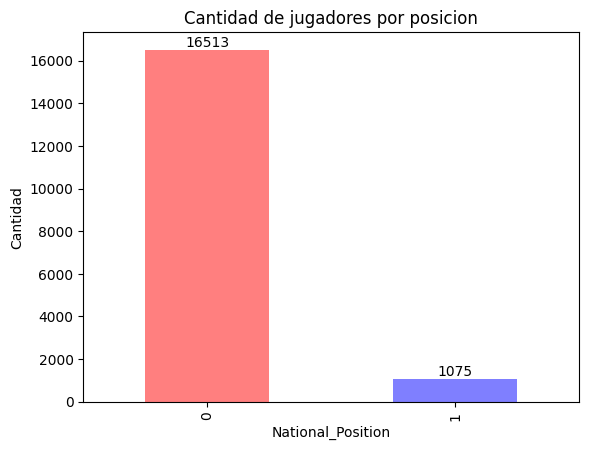

In [4]:
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder


df['label'] = df['National_Position'].notnull()
df['label'] = df['label'].astype(int)

df['label'].value_counts().plot(kind='bar', color=['red', 'blue'], alpha=0.5)
plt.xlabel('National_Position')
plt.ylabel('Cantidad')
plt.title('Cantidad de jugadores por posicion')
for i in range(len(df['label'].value_counts())):
    plt.text(i, df['label'].value_counts()[i], df['label'].value_counts()[i], ha = 'center', va = 'bottom')
plt.show()


numeric_estandar = [
    'Height', 'Weight', 'Age','Ball_Control','Dribbling','Marking',
    'Acceleration','Sliding_Tackle','Standing_Tackle', 'Aggression',
      'Reactions', 'Interceptions', 'Vision',
       'Composure', 'Crossing', 'Short_Pass', 'Long_Pass',
      'Speed', 'Stamina', 'Strength', 'Balance',
    'Agility', 'Jumping','Heading', 'Shot_Power'
]

numeric_normalizar =['Finishing',
    'Long_Shots', 'Curve', 'Freekick_Accuracy',
    'Penalties', 'Volleys']

categorical_features = [
    'Nationality', 'Club_Position', 'Preffered_Foot']


col_transformer = ColumnTransformer(
    transformers=[
        ('num_estandar', StandardScaler(), numeric_estandar),
        ('num_normalizar', MinMaxScaler(), numeric_normalizar),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('ord_cat', OrdinalEncoder(), ['Work_Rate','Weak_foot', 'Skill_Moves'])
    ]
)




Se puede ver graficamente que se tiene 16513 para la clase 0 y 1075 para la clase 1, osea los datos estan desbalanceados.

- Graficamente, se observo que las variables igual seguian algunos distribuciones parecidas a la normal, por eso se le aplico transformación estandar y algunos la minmaxscaler, ya que tenian una forma menos parecida. Luego  a las categoricas se le aplicó OneHotEncoder que es para transformar a una columna binaria para cada categoría.

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline

X = df.drop(columns=['National_Position', 'label'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)




pipeline_xgboost = Pipeline([
    ('preprocessor', col_transformer),
    ('classifier', XGBClassifier())
])

pipeline_lightgbm = Pipeline([
    ('preprocessor', col_transformer),
    ('classifier', LGBMClassifier())
])

#Entrene los pipelines definidos en el paso anterior con los datos de entrenamiento.
pipeline_xgboost.fit(X_train, y_train)
pipeline_lightgbm.fit(X_train, y_train)






[LightGBM] [Info] Number of positive: 860, number of negative: 13210
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2663
[LightGBM] [Info] Number of data points in the train set: 14070, number of used features: 134
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061123 -> initscore=-2.731797
[LightGBM] [Info] Start training from score -2.731797


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_estandar',
                                                  StandardScaler(),
                                                  ['Height', 'Weight', 'Age',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Acceleration',
                                                   'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggression', 'Reactions',
                                                   'Interceptions', 'Vision',
                                                   'Composure', 'Crossing',
                                                   'Short_Pass', 'Long_Pass',
                                                   'Speed', 'Stamina',
                                                   'Strength', 'Balance',
                                                   'Agility', 'Jumping',
                                                   'Heading', 'Shot_Power']),
                                                 ('num_normalizar',
                                                  MinMaxScaler(),
                                                  ['Finishing', 'Long_Shots',
                                                   'Curve', 'Freekick_Accuracy',
                                                   'Penalties', 'Volleys']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Nationality',
                                                   'Club_Position',
                                                   'Preffered_Foot']),
                                                 ('ord_cat', OrdinalEncoder(),
                                                  ['Work_Rate', 'Weak_foot',
                                                   'Skill_Moves'])])),
                ('classifier', LGBMClassifier())])

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

In [ ]:
#pon semilla para que sea reproducible
np.random.seed(42)
from sklearn.metrics import classification_report

y_pred_xgboost = pipeline_xgboost.predict(X_test)
y_pred_lightgbm = pipeline_lightgbm.predict(X_test)

print('XGBoost')
print(classification_report(y_test, y_pred_xgboost))

print('LightGBM')
print(classification_report(y_test, y_pred_lightgbm))


XGBoost
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3303
           1       0.66      0.37      0.48       215

    accuracy                           0.95      3518
   macro avg       0.81      0.68      0.72      3518
weighted avg       0.94      0.95      0.94      3518

LightGBM
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3303
           1       0.70      0.39      0.50       215

    accuracy                           0.95      3518
   macro avg       0.83      0.69      0.74      3518
weighted avg       0.95      0.95      0.95      3518



Los resultados muestran que aunque el accuracy es alto, esto se debe principalmente al buen rendimiento en la clase mayoritaria, ya que para la clase 1, la precisión de 0.66 (XGBoost) y 0.70 (LightGBM) significa que solo ese porcentaje de predicciones positivas fue correcto, mientras que el recall de 0.37 (XGBoost) y 0.39 (LightGBM) indica que se identificó correctamente un bajo porcentaje de todos los verdaderos positivos. La cantidad desequilibrada de ejemplos por clase contribuye a que el modelo se desempeñe mejor en la detección de la clase 0, ignorando parcialmente la clase 1, lo que resulta en un bajo recall para la clase positiva.

Entre XGBoost y LightGBM, el modelo LightGBM muestra un mejor desempeño para la clase positiva en términos de precisión, recall y f1-score. LightGBM alcanza una precisión de 0.70 y un recall de 0.39, con un f1-score de 0.50, superando ligeramente a XGBoost en estas métricas críticas para la clase minoritaria. Dado el desequilibrio en la distribución de clases, el f1-score, es la métrica que equilibra precision y recall por lo cual es el más adecuado.

LightGBM es el que mejor se desempeña.

## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. Aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

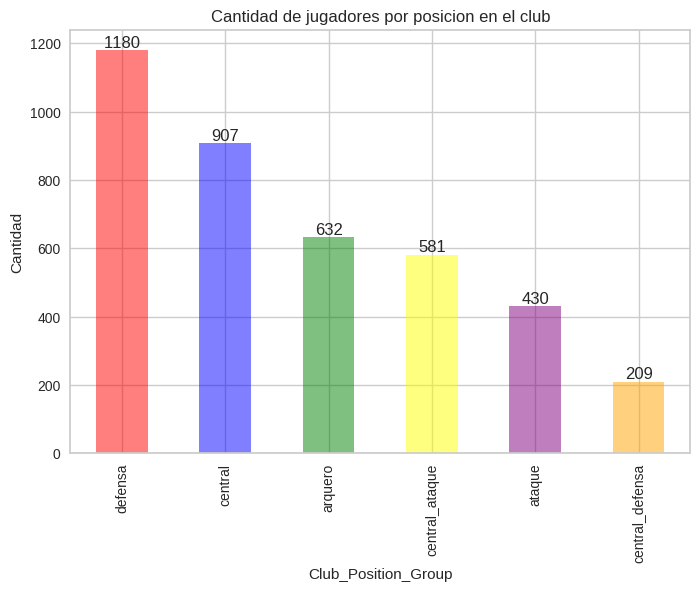

In [ ]:
grupo_posiciones = {
    'ST': 'ataque', 'CF': 'ataque',
    'RW': 'central_ataque', 'CAM': 'central_ataque', 'LW': 'central_ataque',
    'RM': 'central', 'CM': 'central', 'LM': 'central',
    'RWB': 'central_defensa', 'CDM': 'central_defensa', 'LWB': 'central_defensa',
    'RB': 'defensa', 'CB': 'defensa', 'LB': 'defensa',
    'GK': 'arquero'
}


def etiquetar_posiciones(posicion):
    return grupo_posiciones.get(posicion, None)


df['Club_Position_Group'] = df['Club_Position'].apply(etiquetar_posiciones)

df = df[df['Club_Position_Group'].notnull()]


df['Club_Position_Group'].value_counts().plot(kind='bar', color=['red', 'blue', 'green', 'yellow', 'purple', 'orange'], alpha=0.5)
plt.xlabel('Club_Position_Group')
plt.ylabel('Cantidad')
plt.title('Cantidad de jugadores por posicion en el club')
for i in range(len(df['Club_Position_Group'].value_counts())):
    plt.text(i, df['Club_Position_Group'].value_counts()[i], df['Club_Position_Group'].value_counts()[i], ha = 'center', va = 'bottom')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder



categorical_features = [
    'Nationality', 'Preffered_Foot']


col_transformer = ColumnTransformer(
    transformers=[
        ('num_estandar', StandardScaler(), numeric_estandar),
        ('num_normalizar', MinMaxScaler(), numeric_normalizar),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('ord_cat', OrdinalEncoder(), ['Work_Rate','Weak_foot', 'Skill_Moves'])
    ]
)
X = df.drop(columns=['National_Position', 'label','Club_Position_Group'])
y = df['Club_Position_Group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



pipeline_xgboost = Pipeline([
    ('preprocessor', col_transformer),
    ('classifier', XGBClassifier())
])

pipeline_lightgbm = Pipeline([
    ('preprocessor', col_transformer),
    ('classifier', LGBMClassifier())
])


label_encoder = LabelEncoder()

# Codificar las etiquetas
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Ahora puedes utilizar estas etiquetas codificadas para entrenar tus modelos
pipeline_xgboost.fit(X_train, y_train_encoded)
pipeline_lightgbm.fit(X_train, y_train_encoded)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2397
[LightGBM] [Info] Number of data points in the train set: 3151, number of used features: 70
[LightGBM] [Info] Start training from score -1.828938
[LightGBM] [Info] Start training from score -2.214833
[LightGBM] [Info] Start training from score -1.469303
[LightGBM] [Info] Start training from score -1.913438
[LightGBM] [Info] Start training from score -2.937481
[LightGBM] [Info] Start training from score -1.205349
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_estandar',
                                                  StandardScaler(),
                                                  ['Height', 'Weight', 'Age',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Acceleration',
                                                   'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggression', 'Reactions',
                                                   'Interceptions', 'Vision',
                                                   'Composure', 'Crossing',
                                                   'Short_Pass', 'Long_Pass',
                                                   'Speed', 'Stamina',
                                                   'Strength', 'Balance',
                                                   'Agility', 'Jumping',
                                                   'Heading', 'Shot_Power']),
                                                 ('num_normalizar',
                                                  MinMaxScaler(),
                                                  ['Finishing', 'Long_Shots',
                                                   'Curve', 'Freekick_Accuracy',
                                                   'Penalties', 'Volleys']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Nationality',
                                                   'Preffered_Foot']),
                                                 ('ord_cat', OrdinalEncoder(),
                                                  ['Work_Rate', 'Weak_foot',
                                                   'Skill_Moves'])])),
                ('classifier', LGBMClassifier())])

In [ ]:
#4. Comente los resultados obtenidos.
y_pred_xgboost = pipeline_xgboost.predict(X_test)
y_pred_lightgbm = pipeline_lightgbm.predict(X_test)

print('XGBoost')
print(classification_report(y_test_encoded, y_pred_xgboost))

print('LightGBM')
print(classification_report(y_test_encoded, y_pred_lightgbm))


XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       0.74      0.83      0.78        86
           2       0.61      0.62      0.62       182
           3       0.52      0.41      0.45       116
           4       0.38      0.19      0.25        42
           5       0.84      0.96      0.90       236

    accuracy                           0.75       788
   macro avg       0.68      0.67      0.67       788
weighted avg       0.73      0.75      0.74       788

LightGBM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       0.76      0.84      0.80        86
           2       0.58      0.59      0.59       182
           3       0.50      0.40      0.44       116
           4       0.31      0.12      0.17        42
           5       0.83      0.96      0.89       236

    accuracy                           0.74       788
   mac

Los resultados muestran que XGBoost y LightGBM tienen un desempeño destacado en algunas clases (especialmente la 0 y la 5), pero enfrentan dificultades con otras, como la 4. XGBoost supera ligeramente a LightGBM, mostrando mejor precisión y recall en promedio. Las bajas métricas en ciertas clases sugieren la necesidad de mejorar la ingeniería de características y el balance de clases.

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 2.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos] Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

3. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

4. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

In [14]:
#catboost no se pudo por temas de libreria, lanzaba error

In [13]:
from pycaret.classification import *

clf = setup(data=df, target='label', session_id=123, html=False)

tree_models = ['et', 'rf', 'dt', 'xgboost', 'lightgbm']

best_model = compare_models(include=tree_models)





                    Description             Value
0                    Session id               123
1                        Target             label
2                   Target type            Binary
3           Original data shape       (17588, 40)
4        Transformed data shape       (17588, 48)
5   Transformed train set shape       (12311, 48)
6    Transformed test set shape        (5277, 48)
7              Numeric features                33
8          Categorical features                 6
9      Rows with missing values             93.9%
10                   Preprocess              True
11              Imputation type            simple
12           Numeric imputation              mean
13       Categorical imputation              mode
14     Maximum one-hot encoding                25
15              Encoding method              None
16               Fold Generator   StratifiedKFold
17                  Fold Number                10
18                     CPU Jobs                -1


                                    Model  Accuracy     AUC  Recall   Prec.  \
rf               Random Forest Classifier    0.9601  0.9402  0.3588  0.9666   
et                 Extra Trees Classifier    0.9523  0.8868  0.2313  0.9477   
dt               Decision Tree Classifier    0.9383  0.5009  0.0027  0.1333   
xgboost         Extreme Gradient Boosting    0.9383  0.8608  0.0027  0.1333   
lightgbm  Light Gradient Boosting Machine    0.9383  0.6254  0.0027  0.1333   

              F1   Kappa     MCC  TT (Sec)  
rf        0.5199  0.5039  0.5736     1.960  
et        0.3670  0.3522  0.4510     1.799  
dt        0.0052  0.0035  0.0126     0.434  
xgboost   0.0052  0.0035  0.0126     0.660  
lightgbm  0.0052  0.0035  0.0126     2.959  


Los modelos et (Extra Trees), rf (Random Forest) y dt (Decision Tree) son algoritmos de aprendizaje automático.
- Decision Tree divide los datos basándose en condiciones para clasificación o regresión.
- Random Forest construye múltiples árboles de decisión y combina sus predicciones para mejorar la precisión.
- Extra Trees es similar a Random Forest pero elige aleatoriamente los puntos de división y utiliza subconjuntos más pequeños de características, lo que puede mejorar la eficiencia computacional sacrificando un poco la precisión.


In [16]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Confusión Matrix: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?

Tasa de Verdaderos Positivos (Recall) para la clase 1 (positiva) es 0.5, lo que significa que el modelo identifica correctamente el 50% de los casos positivos reales.
Tasa de Verdaderos Negativos para la clase 0 (negativa) es 0.999, lo que indica que el modelo es casi perfecto (99.9% efectivo) en identificar correctamente los casos negativos reales.


Threshold: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?

El umbral por defecto es aproximadamente 0.14 podría ser más óptimo para este modelo dado el contexto de las métricas evaluadas esto podría maximizar el F1 score.


Feature Importance: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?

Name, National_position, Reactions, se puede deber a que son cosas muy exactas.


Learning Curve: ¿El modelo presenta algún problema?

En general presenta una curva de aprendizaje muy variante, pero se puede deber a las features importantes que esta tomando.


### 2.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
y=df['label']
preprocessor = ColumnTransformer(
    transformers=[
        ('num_estandar', StandardScaler(), numeric_estandar),
        ('num_normalizar', MinMaxScaler(), numeric_normalizar),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('ord_cat', OrdinalEncoder(), ['Work_Rate', 'Weak_foot', 'Skill_Moves'])
    ]
)

X_prepared = preprocessor.fit_transform(df)
print(X_prepared.shape)

X_train_prepared, X_test_prepared, y_train, y_test = train_test_split(
    X_prepared, y, test_size=0.2, stratify=y, random_state=42
)

model = XGBClassifier()

model.fit(X_train_prepared, y_train)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

feature_names = df.columns
feature_importances = list(zip(feature_names, importances))

feature_importances.sort(key=lambda x: x[1], reverse=True) ## De mayor a menor importancia

top_10_features = feature_importances[:10]

# Imprimir las 10 características más importantes
print("Las 10 características más importantes son:")
for feature, importance in top_10_features:
    print(f"{feature}: {importance}")

## Resultados del modelo
y_pred = model.predict(X_test_prepared)
print(classification_report(y_test, y_pred))


(17588, 226)
Las 10 características más importantes son:
Skill_Moves: 0.03233383968472481
Freekick_Accuracy: 0.016726044937968254
label: 0.011070377193391323
Work_Rate: 0.0102372532710433
Marking: 0.010004703886806965
Standing_Tackle: 0.007777206599712372
National_Position: 0.0074223740957677364
Interceptions: 0.007024563383311033
Club_Position: 0.006937702652066946
Height: 0.006520213559269905
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3303
           1       0.66      0.37      0.48       215

    accuracy                           0.95      3518
   macro avg       0.81      0.68      0.72      3518
weighted avg       0.94      0.95      0.94      3518



In [9]:
from sklearn.metrics import f1_score ## por el desbalance

# Función para realizar la búsqueda recursiva de eliminación de características
def recursive_feature_elimination(model, X_train, y_train, X_test, y_test, feature_names, min_features=5):
    features = list(range(X_train.shape[1]))  # Índices de las características
    #print(features)
    n_features = len(features)
    performance_history = []

    while n_features > min_features:
        # Entrenar el modelo
        model.fit(X_train[:, features], y_train)

        # Evaluar el modelo
        y_pred = model.predict(X_test[:, features])
        performance = f1_score(y_test, y_pred, average='weighted')  # Cambia a 'binary' si es una clasificación binaria
        performance_history.append((n_features, performance))

        # Obtener las importancias de las características
        importances = model.feature_importances_

        # Identificar la característica menos importante
        least_important_feature_index = np.argmin(importances)
        least_important_feature = features[least_important_feature_index]

        # Eliminar la característica menos importante
        features.remove(least_important_feature)
        n_features -= 1

        #print(f"Removed feature: {feature_names[least_important_feature]}, F1 Score: {performance}")

    selected_features = features
    return selected_features, performance_history

model = XGBClassifier()

selected_features, performance_history = recursive_feature_elimination(
    model, X_train_prepared, y_train, X_test_prepared, y_test, feature_names.to_list())

print("Características seleccionadas:", selected_features)

Características seleccionadas: [51, 59, 103, 149, 187]


In [10]:
## Seleccionar características en X_train_prepared y X_test_prepared según selected_features

X_train_selected = X_train_prepared[:, selected_features]
X_test_selected = X_test_prepared[:, selected_features]

# Entrenar un modelo con las características seleccionadas
model.fit(X_train_selected, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test_selected)

f1 = f1_score(y_test, y_pred, average='weighted')  # Cambia a 'binary' si es una clasificación binaria

print(f"F1 Score con características seleccionadas: {f1}")
## precisión, recall, f1-score, support
print(classification_report(y_test, y_pred))

F1 Score con características seleccionadas: 0.9178413554567063
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3303
           1       0.53      0.08      0.14       215

    accuracy                           0.94      3518
   macro avg       0.74      0.54      0.55      3518
weighted avg       0.92      0.94      0.92      3518



## 1.- Son similares, muy similares los resultados. Hay una pérdida de precisión, pero no es significativa. La pérdida mayor está en la precisión con la que se clasifica la clase 1.

## 2.- Se evita overfitting, ya que ciertas características podrían aportar información específica de la muestra de entrenamiento, pero no generalizar a la de prueba.

## 3.-Sí, es más sencillo de explicar porque se mantienen solo aquellas características que son de mayor importancia para que el modelo se comporte correctamente.Es difícil, sobre todo en modelos más complejos, estudiar exactamente por qué el modelo toma ciertas decisiones. Pero al tener menos características se puede ir estudiando donde se realizan los cortes y tratar de explicar por qué, al menos hasta cierto punto. Además, el tener que N características son de importancia de por sí entrega cierta interpretabilidad al modelo.

### 2.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

In [ ]:
from sklearn.metrics import brier_score_loss

y_probs = model.predict_proba(X_test)[:, 1]  # Asumiendo que es un problema binario
brier_score_unscaled = brier_score_loss(y_test, y_probs)
print(f"Brier Score (sin calibrar): {brier_score_unscaled}")

from sklearn.calibration import CalibratedClassifierCV

calibrator = CalibratedClassifierCV(model, method='isotonic', cv='prefit')
calibrator.fit(X_train, y_train)

y_probs_calibrated = calibrator.predict_proba(X_test)[:, 1]
brier_score_scaled = brier_score_loss(y_test, y_probs_calibrated)
print(f"Brier Score (calibrado): {brier_score_scaled}")

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(y_probs, bins=50, alpha=0.5, label='Sin Calibrar')
plt.hist(y_probs_calibrated, bins=50, alpha=0.5, label='Calibrado')
plt.title('Comparación de Probabilidades: Sin Calibrar vs Calibrado')
plt.xlabel('Probabilidad Predicha')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()
